In [1]:
import numpy as np
import pickle
import lzma

import elephant.statistics as estats
import elephant
import neo
from quantities import ms, s, Hz

from elephant.spike_train_dissimilarity import victor_purpura_distance
from elephant.spike_train_dissimilarity import van_rossum_distance

import pandas as pd
import matplotlib.pyplot as plt

import multiprocessing
import seaborn as sns

In [2]:
!pwd

/vast/palmer/scratch/mcdougal/rh882/NetworkErrorSmall


In [3]:

def get_vpdist(networktype, layercount, meandelay, stddelay, model_id, input_idx, n_run, CellType = "point"):
    name = networktype + '_' + str(CellType) + '_layercount' + str(layercount) + '_model' + str(model_id) + '_input' + str(input_idx) + '_stddelay' + str(stddelay) + '_meandelay' + str(meandelay) + '_nrun' + str(n_run)
    with lzma.open("./VP_every/" + name + "_vp.xz", "rb") as fp:
          outsaved = pickle.load(fp)
    return outsaved
        
def get_vrdist(networktype, layercount, meandelay, stddelay, model_id, input_idx, n_run, CellType = "point"):
    name = networktype + '_' + str(CellType) + '_layercount' + str(layercount) + '_model' + str(model_id) + '_input' + str(input_idx) + '_stddelay' + str(stddelay) + '_meandelay' + str(meandelay) + '_nrun' + str(n_run)
    with lzma.open("./VR_every_decomplex/" + name + "_vr.xz", "rb") as fp:
          outsaved = pickle.load(fp)
    return outsaved


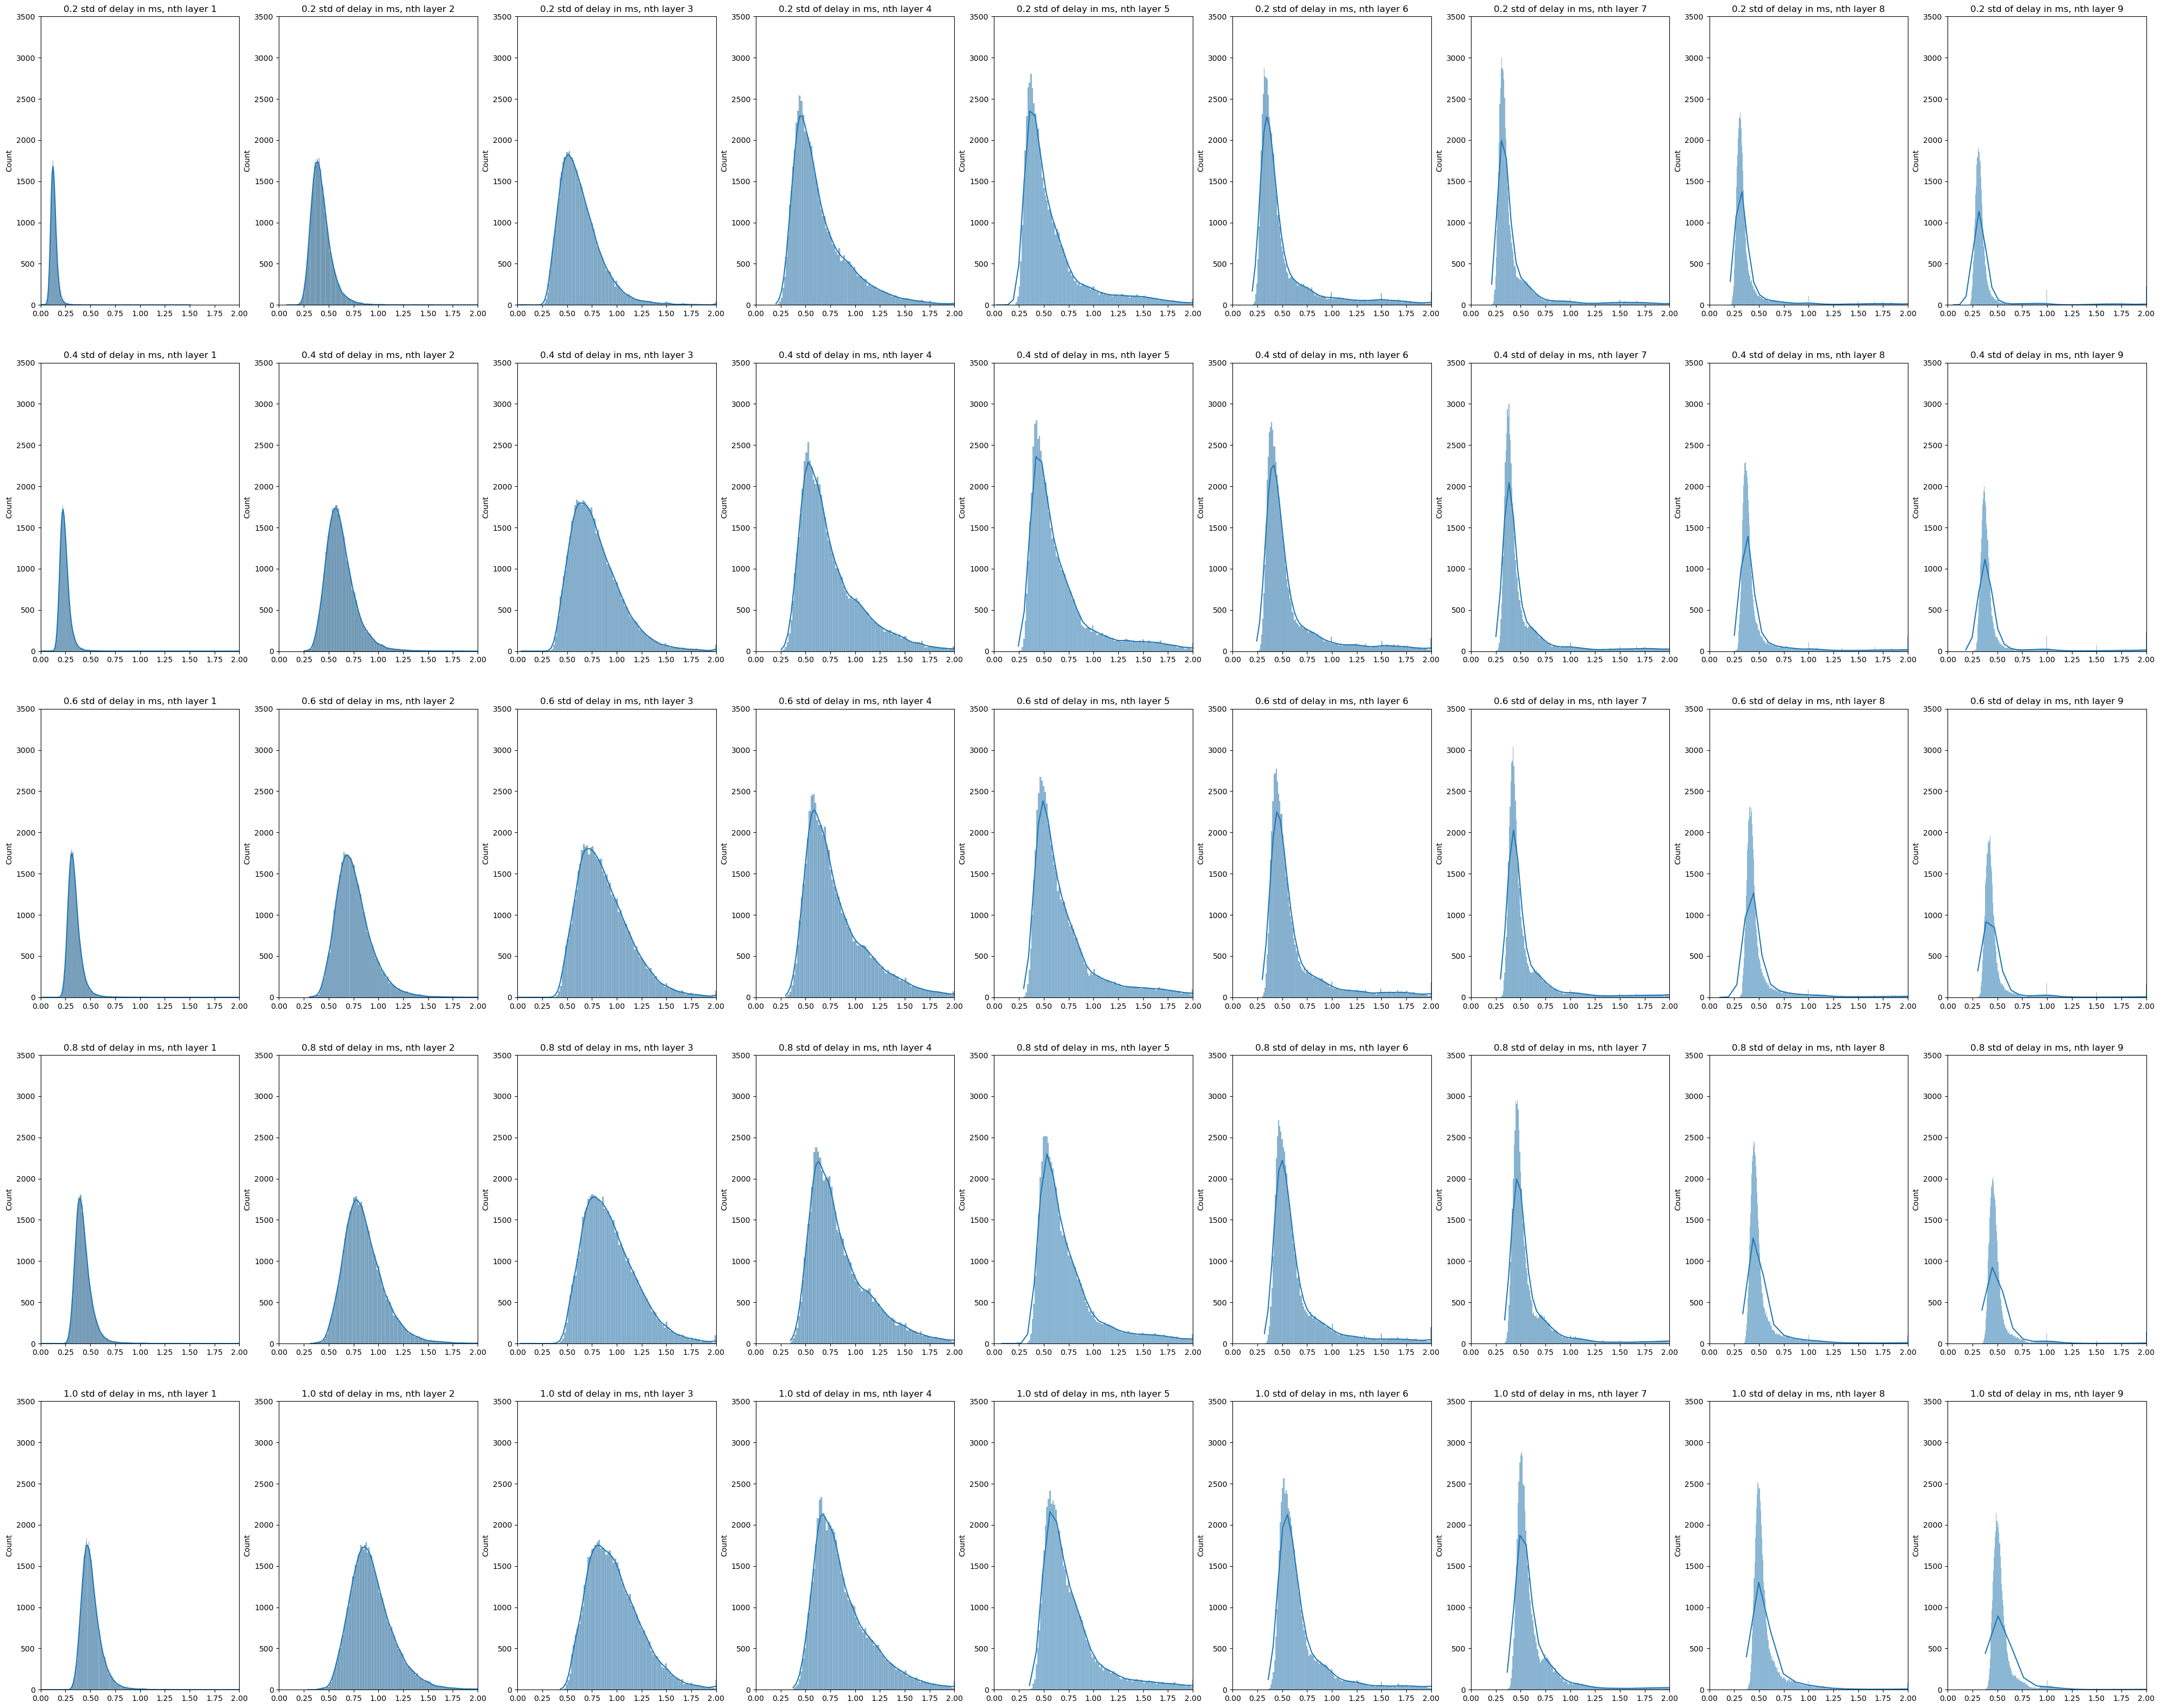

In [6]:
networktype = 'FeedForward'
CellType = 'point'
layercount  = 60
meandelay = 3.0

std_delay_lst = []
for stdDelay_noround in np.arange(0.2, 1.01, 0.2):
        stdDelay = np.round(stdDelay_noround,2)
        std_delay_lst.append(stdDelay)
        
fig, axs = plt.subplots(len(std_delay_lst), 9, figsize=(len(std_delay_lst)*10, 4*10))
counter_i = -1
for stddelay in std_delay_lst:
    alloutsaved = []
    for modelid in range(10):
        for inputid in range(10):
            for nrun in range(10):    
                outsaved = get_vpdist(networktype, layercount, meandelay, stddelay, modelid, inputid, nrun, CellType)
                alloutsaved.append(outsaved)
    distr = np.vstack(alloutsaved)
    counter_i += 1 
    counter_j = -1
    for layerid in range(1, 10):
        counter_j += 1
        # print(counter_i, counter_j)
        layerdata = distr[(distr[:, 2] == layerid)&(distr[:, 1] != 0)&(distr[:, 0] != 0), ]
        # layerdata = distr[(distr[:, 2] == layerid)&(distr[:, 1] != 0), ] 
        toplot = layerdata[:, 0] 
        # axs[counter_i, counter_j].hist(toplot, bins=300, edgecolor='black')
        sns.histplot(toplot, kde=True, ax=axs[counter_i, counter_j])
        # axs[counter_i, counter_j].xlabel('VP per spike')
        # axs[counter_i, counter_j].ylabel('Frequency')
        axs[counter_i, counter_j].set_xlim(0, 2)
        axs[counter_i, counter_j].set_ylim(0, 3500)
        axs[counter_i, counter_j].set_title('{} std of delay in ms, nth layer {}'.format(stddelay, layerid))


plt.savefig('example1.png')


In [4]:
# # SingleCellDistribution
# networktype = 'FeedForward'
# CellType = 'point'
# layercount = 60
# meandelay = 3.0
# modelid = 0
# inputid = 0
# cellid = 140


# std_delay_lst = [np.round(stdDelay_noround, 2) for stdDelay_noround in np.arange(0.1, 1.01, 0.1)]
# stddelay = std_delay_lst[5]
# print(stddelay)

# alloutsaved = []
# for nrun in range(10):
#     # Assuming get_vpdist is a function you've defined elsewhere
#     outsaved = get_vpdist(networktype, layercount, meandelay, stddelay, modelid, inputid, nrun, CellType)
#     alloutsaved.append(outsaved[cellid])
# distr = np.vstack(alloutsaved)
# sns.histplot(distr[:, 0], kde=True)
# distr[:, 0]

In [5]:
# networktype = 'FeedForward'
# CellType = 'point'
# layercount = 60
# meandelay = 3.0

# std_delay_lst = [np.round(stdDelay_noround, 2) for stdDelay_noround in np.arange(0.1, 1.01, 0.1)]

# for stddelay in std_delay_lst:
#     alloutsaved = []
#     for modelid in range(10):
#         for inputid in range(10):
#             for nrun in range(10):
#                 # Assuming get_vpdist is a function you've defined elsewhere
#                 outsaved = get_vpdist(networktype, layercount, meandelay, stddelay, modelid, inputid, nrun, CellType)
#                 alloutsaved.append(outsaved)
#     distr = np.vstack(alloutsaved)
#     for layerid in range(1, 10):
#         layerdata = distr[(distr[:, 2] == layerid) & (distr[:, 1] != 0) & (distr[:, 0] != 0), ]
#         toplot = layerdata[:, 0]
#         print("average VP of the layer is:", str(np.mean(toplot)))
#         sns.histplot(toplot, kde=True)
#         plt.xlim(0, 2)  # Corrected line
#         plt.xlabel('VP per spike')
#         plt.ylabel('Frequency')
#         plt.title(f'{stddelay} std of delay in ms, nth layer {layerid}')
#         plt.show()

In [6]:
networktype = 'FeedForward'
CellType = 'point'
layercount  = 40
meandelay = 3.0

std_delay_lst = []
for stdDelay_noround in np.arange(0.1, 1.01, 0.1):
        stdDelay = np.round(stdDelay_noround,2)
        std_delay_lst.append(stdDelay)
        
fig, axs = plt.subplots(len(std_delay_lst), 10, figsize=(len(std_delay_lst)*10, 10*10))
counter_i = -1
for stddelay in std_delay_lst:
    alloutsaved = []
    for modelid in range(10):
        for inputid in range(10):
            for nrun in range(10):    
                outsaved = get_vpdist(networktype, layercount, meandelay, stddelay, modelid, inputid, nrun, CellType)
                alloutsaved.append(outsaved)
    distr = np.vstack(alloutsaved)
    counter_i += 1 
    counter_j = -1
    for layerid in range(0, 10):
        counter_j += 1
        # print(counter_i, counter_j)
        layerdata = distr[(distr[:, 2] == layerid)&(distr[:, 1] != 0)&(distr[:, 0] != 0), ]
        # layerdata = distr[(distr[:, 2] == layerid)&(distr[:, 1] != 0), ] 
        toplot = layerdata[:, 0] 
        # axs[counter_i, counter_j].hist(toplot, bins=300, edgecolor='black')
        sns.histplot(toplot, kde=True, ax=axs[counter_i, counter_j])
        # axs[counter_i, counter_j].xlabel('VP per spike')
        # axs[counter_i, counter_j].ylabel('Frequency')
        axs[counter_i, counter_j].set_xlim(0, 2)
        axs[counter_i, counter_j].set_ylim(0, 3500)
        axs[counter_i, counter_j].set_title('{} std of delay in ms, nth layer {}'.format(stddelay, layerid))


plt.savefig('example1.png')


In [ ]:
# networktype = 'FeedForward'
# CellType = 'point'
# layercount  = 40
# meandelay = 3.0

# std_delay_lst = []
# for stdDelay_noround in np.arange(0.1, 1.01, 0.1):
#         stdDelay = np.round(stdDelay_noround,2)
#         std_delay_lst.append(stdDelay)
        
# fig, axs = plt.subplots(len(std_delay_lst), 10, figsize=(len(std_delay_lst)*10, 10*10))
# counter_i = -1
# for stddelay in std_delay_lst:
#     alloutsaved = []
#     for modelid in range(10):
#         for inputid in range(10):
#             for nrun in range(10):    
#                 outsaved = get_vrdist(networktype, layercount, meandelay, stddelay, modelid, inputid, nrun, CellType)
#                 alloutsaved.append(outsaved)
#     distr = np.vstack(alloutsaved)
#     counter_i += 1 
#     counter_j = -1
#     for layerid in range(0, 10):
#         counter_j += 1
#         # print(counter_i, counter_j)
#         layerdata = distr[(distr[:, 2] == layerid)&(distr[:, 1] != 0)&(distr[:, 0] != 0), ]
#         # layerdata = distr[(distr[:, 2] == layerid)&(distr[:, 1] != 0), ] 
#         toplot = layerdata[:, 0] 
#         # axs[counter_i, counter_j].hist(toplot, bins=300, edgecolor='black')
#         sns.histplot(toplot, kde=True, ax=axs[counter_i, counter_j])
#         # axs[counter_i, counter_j].xlabel('VP per spike')
#         # axs[counter_i, counter_j].ylabel('Frequency')
#         axs[counter_i, counter_j].set_xlim(0, 0.25)
#         axs[counter_i, counter_j].set_ylim(0, 3500)
#         axs[counter_i, counter_j].set_title('{} std of delay in ms, nth layer {}'.format(stddelay, layerid))

        



FileNotFoundError: [Errno 2] No such file or directory: './VR_every_decomplex/FeedForward_point_layercount40_model0_input0_stddelay0.1_meandelay3.0_nrun0_vr.xz'